# <b>imshow</b>

This section provides examples of how to use the <b>imshow</b> function.  At a minimum, the `imshow` function requires the following keywords:
<ul>
<li>df: a pandas DataFrame</li>
</ul>

imshow in <b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> is mainly used to display images with a colormap applied.

## Setup

### Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import fivecentplots as fcp
import pandas as pd
import numpy as np
import os, sys, pdb
osjoin = os.path.join
db = pdb.set_trace
utl = fcp.utilities

### Read an image

In [2]:
import imageio
url = 'https://imagesvc.meredithcorp.io/v3/mm/image?q=85&c=sc&rect=0%2C214%2C2000%2C1214&poi=%5B920%2C546%5D&w=2000&h=1000&url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F47%2F2020%2F10%2F07%2Fcat-in-pirate-costume-380541532-2000.jpg'
imgr = imageio.imread(url)
imgr

Array([[[220, 221, 223],
        [220, 221, 223],
        [220, 221, 223],
        ...,
        [219, 220, 222],
        [219, 220, 222],
        [219, 220, 222]],

       [[220, 221, 223],
        [220, 221, 223],
        [220, 221, 223],
        ...,
        [219, 220, 222],
        [219, 220, 222],
        [219, 220, 222]],

       [[220, 221, 223],
        [220, 221, 223],
        [220, 221, 223],
        ...,
        [219, 220, 222],
        [219, 220, 222],
        [219, 220, 222]],

       ...,

       [[108,  95,  86],
        [106,  93,  84],
        [103,  90,  81],
        ...,
        [209, 211, 210],
        [209, 211, 210],
        [209, 211, 210]],

       [[107,  94,  85],
        [105,  92,  83],
        [103,  90,  81],
        ...,
        [210, 212, 211],
        [210, 212, 211],
        [210, 212, 211]],

       [[106,  93,  84],
        [105,  92,  83],
        [103,  90,  81],
        ...,
        [210, 212, 211],
        [210, 212, 211],
        [210, 212, 211]]

### Convert image to grayscale

In [3]:
img = fcp.utilities.img_grayscale(imgr)
img.head()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,220.907,220.907,220.907,220.907,220.907,220.907,220.907,220.907,220.9070,220.9070,...,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071
1,220.907,220.907,220.907,220.907,220.907,220.907,220.907,220.907,219.9071,219.9071,...,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071
2,220.907,220.907,220.907,220.907,220.907,220.907,220.907,220.907,219.9071,219.9071,...,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071
3,220.907,220.907,220.907,220.907,220.907,220.907,220.907,220.907,219.9071,219.9071,...,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071
4,220.907,220.907,220.907,220.907,220.907,220.907,220.907,220.907,220.9070,220.9070,...,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071


### Set theme

In [4]:
#fcp.set_theme('gray')
#fcp.set_theme('white')

### Other

In [5]:
SHOW = False

## Basic image display

Display an image depicting one of many problems with human-feline interactions.

*Note: the ratio of the image height and width are preserved regardless of the values of `ax_size`, which will just apply to the biggest of the two dimensions*

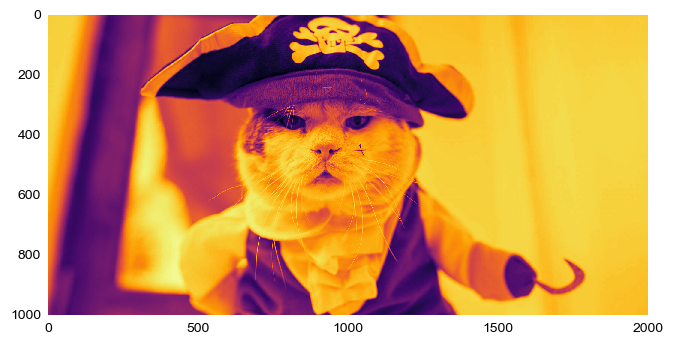

In [6]:
fcp.imshow(img, cmap='inferno', ax_size=[600, 600], show=SHOW)

## Colorbar

We can add a colorbar to the image using the kwarg ``cbar=True``

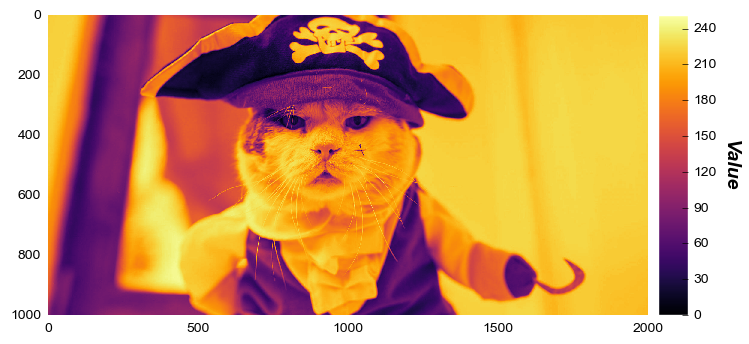

In [7]:
fcp.imshow(img, cmap='inferno', ax_size=[600, 600], cbar=True, show=SHOW)

## Zoom

We can zoom into this kitten by changing the `x` and `y` limits:

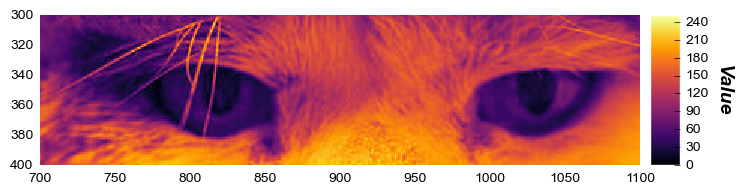

In [8]:
fcp.imshow(img, cmap='inferno', cbar=True, ax_size=[600, 600], xmin=700, xmax=1100, ymin=300, ymax=400, show=SHOW)

<i> private eyes are watching you... </i>

## Contrast stretching

In some cases (such as raw image sensor analysis) it is helpful to adjust the colormap limits in order to "stretch" the contrast.  This can be done via the `z` axis limits.  In this example, we stretch +/-3 standard deviations from the mean pixel value.

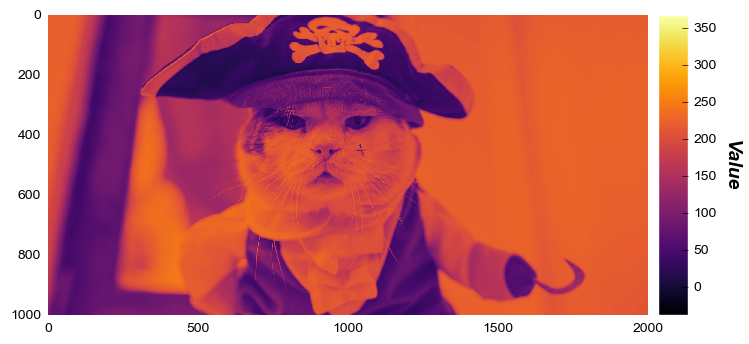

In [9]:
uu = img.stack().mean()
ss = img.stack().std()
fcp.imshow(img, cmap='inferno', cbar=True, ax_size=[600, 600], zmin=uu-3*ss, zmax=uu+3*ss, show=SHOW)

imshow plots in <b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> also provides a convenient kwarg called `stretch` which applies e a numerical multiplier of standard deviation above and below the mean and automatically calculates new z-limits (essentially the same thing as done above manually).  `stretch` can be a single value of std dev which is interpreted as +/- that value or a list with the lower and higher std deviation respectively.  First, we consider a +/- 3 sigma stretch as above:

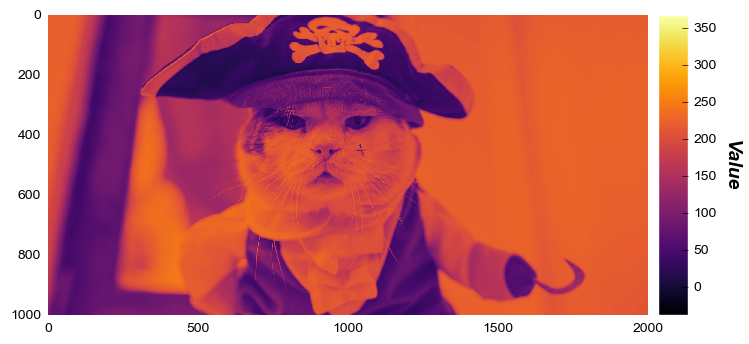

In [10]:
fcp.imshow(img, cmap='inferno', cbar=True, ax_size=[600, 600], stretch=3, show=SHOW)

Now we show a single-sided stretch that only applies to the upper z-limit:

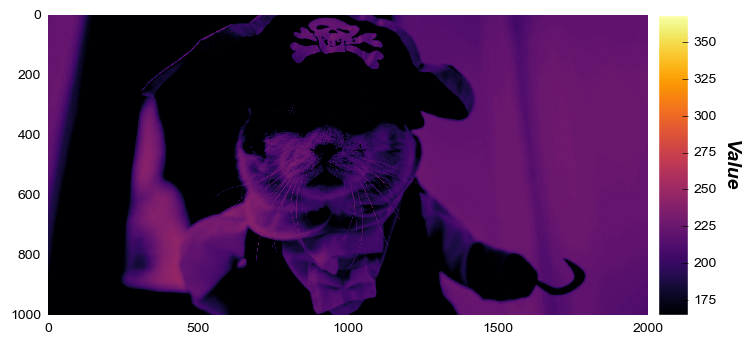

In [11]:
fcp.imshow(img, cmap='inferno', cbar=True, ax_size=[600, 600], stretch=[0, 3], show=SHOW)

## Split color planes

For some applications, it is useful to split a raw image based on some CFA pattern.  <b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> provides a simple utility function to do this and ``imshow`` can be used to display the result.  The utility returns a concatenated DataFrame consisting of the data from each color plane:

In [12]:
temp = fcp.utilities.split_color_planes(img, cfa='rggb')
for plane in temp.Plane.unique():
    print(temp.loc[temp.Plane==plane].head())

         0        2        4        6         8        10        12        14  \
0  220.907  220.907  220.907  220.907  220.9070  220.9070  220.9070  220.9070   
2  220.907  220.907  220.907  220.907  219.9071  219.9071  219.9071  219.9071   
4  220.907  220.907  220.907  220.907  220.9070  220.9070  220.9070  220.9070   
6  220.907  220.907  220.907  220.907  220.9070  220.9070  220.9070  220.9070   
8  220.907  220.907  220.907  220.907  221.9069  221.9069  221.9069  221.9069   

         16        18  ...  1983  1985  1987  1989  1991  1993  1995  1997  \
0  221.9069  221.9069  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2  221.9069  221.9069  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  221.9069  221.9069  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
6  221.9069  221.9069  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8  221.9069  221.9069  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1999  Plane  
0   NaN      r  
2   NaN   

For ease of use, however, you do not need to actually use this utility manually.  Adding the kwarg ``cfa`` to the ``imshow`` call will run the utility automatically:

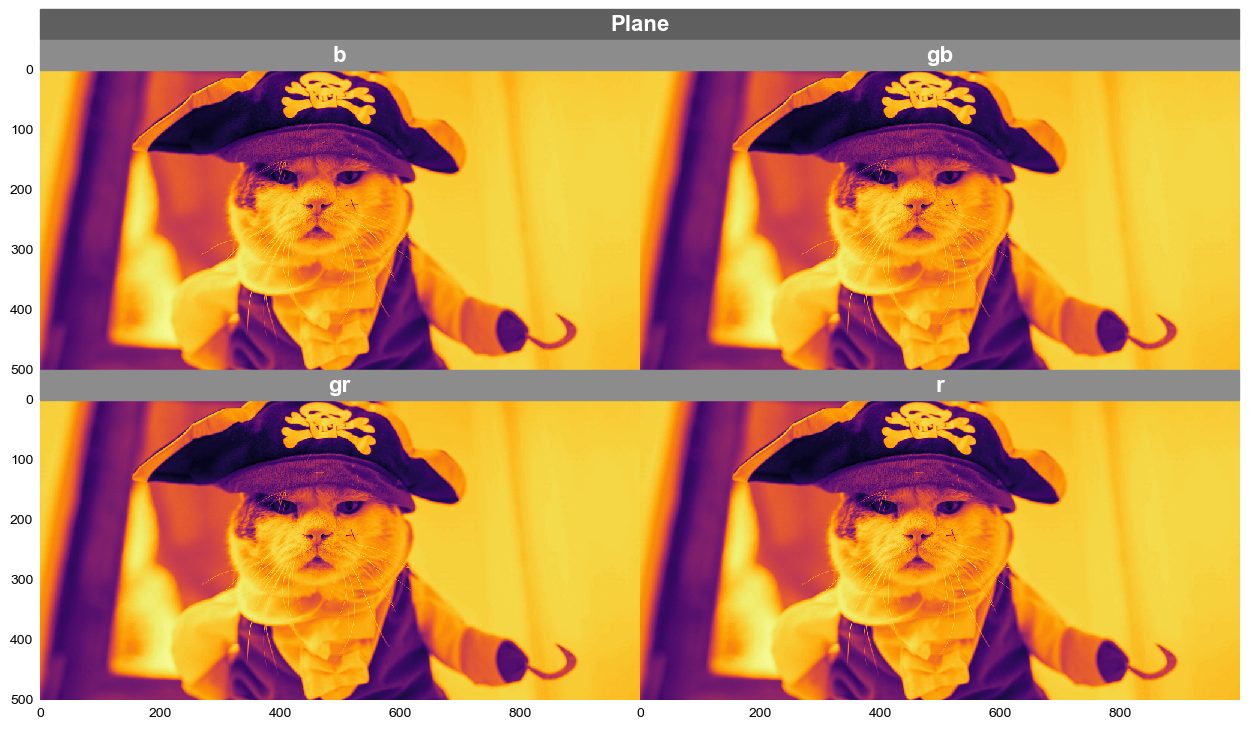

In [13]:
fcp.imshow(img, cmap='inferno', ax_size=[600, 600], cfa='rggb', wrap='Plane', show=SHOW)